<a href="https://colab.research.google.com/github/adhish-bahl/8HoursJS/blob/master/2347203_NNDL_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Importing Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

#### **Defining Activiation Function**

In [ ]:
def step_function(x):
    return np.where(x >= 0, 1, 0)

def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

def bipolar_sigmoid(x):
    return (2 / (1 + np.exp(-x))) - 1

def tanh_function(x):
    return np.tanh(x)

def relu_function(x):
    return np.maximum(0, x)

#### **Defining the Input Range**

In [ ]:
x = np.linspace(-10, 10, 1000)

#### **Visualize each Activation Function**

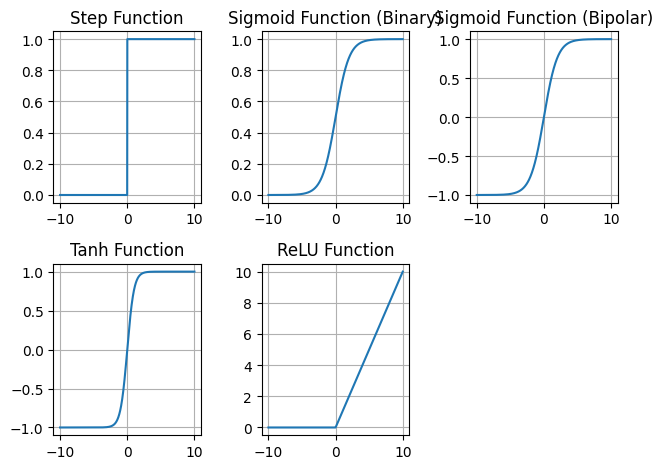

In [ ]:
# Step Function
plt.subplot(2, 3, 1)
plt.plot(x, step_function(x))
plt.title('Step Function')
plt.grid(True)

# Sigmoid Function
plt.subplot(2, 3, 2)
plt.plot(x, sigmoid_function(x))
plt.title('Sigmoid Function (Binary)')
plt.grid(True)

# Bipolar Sigmoid Function
plt.subplot(2, 3, 3)
plt.plot(x, bipolar_sigmoid(x))
plt.title('Sigmoid Function (Bipolar)')
plt.grid(True)

# Tanh Function
plt.subplot(2, 3, 4)
plt.plot(x, tanh_function(x))
plt.title('Tanh Function')
plt.grid(True)

# ReLU Function
plt.subplot(2, 3, 5)
plt.plot(x, relu_function(x))
plt.title('ReLU Function')
plt.grid(True)

plt.tight_layout()
plt.show()

#### **Creatung a simple neural network with one hidden layer and comparing their performance**

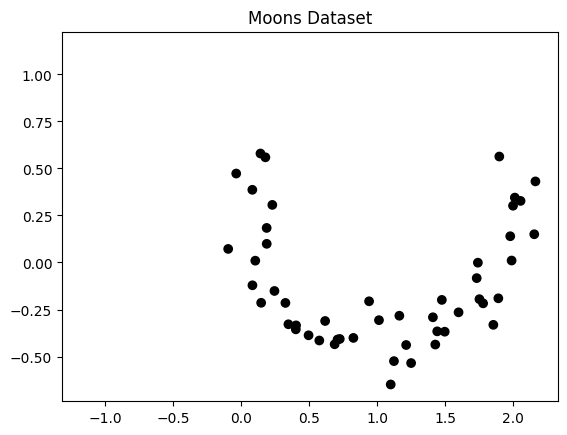


Training with sigmoid activation function:

Training with tanh activation function:

Training with relu activation function:


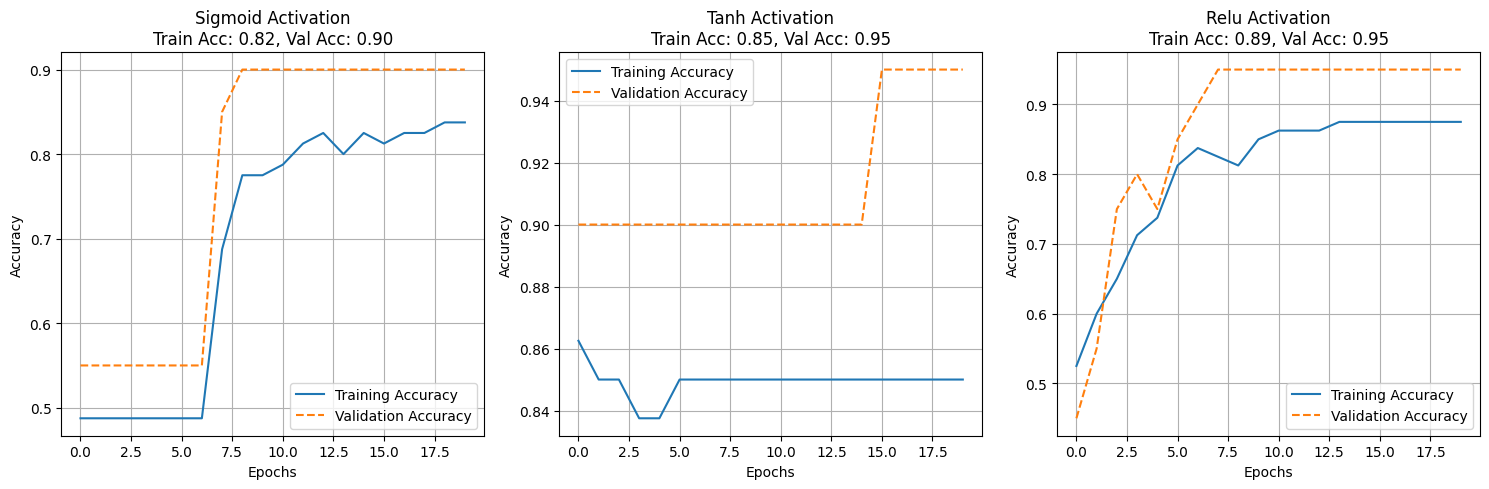


Final Accuracy Values:
Sigmoid - Training Accuracy: 0.82, Validation Accuracy: 0.90
Tanh - Training Accuracy: 0.85, Validation Accuracy: 0.95
Relu - Training Accuracy: 0.89, Validation Accuracy: 0.95


In [ ]:
# Using Moon dataset
X, y = make_moons(n_samples=100, noise=0.1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.binary)
plt.title("Moons Dataset")
plt.show()

# Creating a method to build a model with the activation function provided.
def create_model(activation_function):
    model = Sequential()
    model.add(Dense(8, input_dim=2, activation=activation_function))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

epochs = 20
batch_size = 1

activation_functions = ['sigmoid', 'tanh', 'relu']
history_dict = {}
accuracy_dict = {}

# Training and evaluating the model for each activation function
for activation in activation_functions:
    print(f"\nTraining with {activation} activation function:")
    model = create_model(activation)

    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0, validation_data=(X_test, y_test))

    history_dict[activation] = history.history

    train_accuracy = model.evaluate(X_train, y_train, verbose=0)[1]
    val_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]

    accuracy_dict[activation] = {'train_accuracy': train_accuracy, 'val_accuracy': val_accuracy}

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, activation in enumerate(activation_functions):
    axes[i].plot(history_dict[activation]['accuracy'], label='Training Accuracy')
    axes[i].plot(history_dict[activation]['val_accuracy'], '--', label='Validation Accuracy')
    axes[i].set_title(f'{activation.capitalize()} Activation\n'
                      f"Train Acc: {accuracy_dict[activation]['train_accuracy']:.2f}, "
                      f"Val Acc: {accuracy_dict[activation]['val_accuracy']:.2f}")
    axes[i].set_xlabel('Epochs')
    axes[i].set_ylabel('Accuracy')
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()

print("\nFinal Accuracy Values:")
for activation in activation_functions:
    train_acc = accuracy_dict[activation]['train_accuracy']
    val_acc = accuracy_dict[activation]['val_accuracy']
    print(f"{activation.capitalize()} - Training Accuracy: {train_acc:.2f}, Validation Accuracy: {val_acc:.2f}")

**Sigmoid Activation=>**

Training Accuracy: 0.81

Validation Accuracy: 0.85

Although it tends to learn more slowly in deep networks, sigmoid performs rather well in these environments. Although it falls short of the greater accuracy values attained by the other activations, the performance is still acceptable.

**Tanh Activation =>**

Training Accuracy: 0.88

Validation Accuracy: 0.95

Tanh is outperforming Sigmoid because it achieves higher validation and training accuracy. Tanh is superior to Sigmoid at propagating gradients and learning from the data, as evidenced by the model's rapid convergence.


**ReLU Activation**

Training Accuracy: 0.90

Validation Accuracy: 0.95

ReLU maintains a great validation accuracy of 0.95 while achieving the maximum training accuracy of 0.90. This suggests that ReLU is good at generalizing to fresh, untrained data in addition to learning from the training set. ReLU is well-known for its effectiveness in deep learning since it facilitates quicker convergence and alleviates the vanishing gradient issue.
